In [1]:
from urllib.request import urlopen
import json
import pandas as pd


def get_quandl_dataset(api_key, code, start_date, end_date):
    """Obtain and parse a quandl dataset in Pandas DataFrame format

    Quandl returns dataset in JSON format, where data is stored as a 
    list of lists in response['dataset']['data'], and column headers
    stored in response['dataset']['column_names'].
           
    Args:
        api_key: Quandl API key
        code: Quandl dataset code

    Returns:
        df: Pandas DataFrame of a Quandl dataset

    """
    base_url = "https://www.quandl.com/api/v3/datasets/"
    url_suffix = ".json?api_key="
    date = "&start_date={}&end_date={}".format(start_date, end_date)

    # Fetch the JSON response 
    u = urlopen(base_url + code + url_suffix + api_key + date)
    response = json.loads(u.read().decode('utf-8'))
    
    # Format the response as Pandas Dataframe
    df = pd.DataFrame(response['dataset']['data'], columns=response['dataset']['column_names'])
       
    return df

# Input your own API key here
api_key = "sGHKyHvLbvH1_yfvnUyb"

# Quandl code for six US companies
codes = ["EOD/AAPL", "EOD/PG", "EOD/JNJ", "EOD/XOM", "EOD/IBM", "EOD/MSFT"]
start_date = "2017-01-01"
end_date = "2017-06-30"

dfs = []
# Get the DataFrame that contains the EOD data for each company
for code in codes:
    df = get_quandl_dataset(api_key, code, start_date, end_date)
    df["Company"] = code[4:]
    dfs.append(df)

# Concatenate all dataframes into a single one
stock_df = pd.concat(dfs)

# Sort by ascending order of Company then Date
stock_df = stock_df.sort_values(["Company","Date"])
stock_df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Company
124,2017-01-03,115.80,116.3300,114.76,116.15,28781865.0,0.0,1.0,114.833750,115.359328,113.802428,115.180830,28781865.0,AAPL
123,2017-01-04,115.85,116.5100,115.75,116.02,21118116.0,0.0,1.0,114.883333,115.537826,114.784167,115.051914,21118116.0,AAPL
122,2017-01-05,115.92,116.8642,115.81,116.61,22193587.0,0.0,1.0,114.952749,115.889070,114.843667,115.636991,22193587.0,AAPL
121,2017-01-06,116.78,118.1600,116.47,117.91,31751900.0,0.0,1.0,115.805573,117.174058,115.498159,116.926144,31751900.0,AAPL
120,2017-01-09,117.95,119.4300,117.94,118.99,33561948.0,0.0,1.0,116.965810,118.433461,116.955894,117.997132,33561948.0,AAPL


In [2]:
# Classify companies by industry
tech_companies = set(["AAPL","IBM","MSFT"])
stock_df['Industry'] = ["Tech" if c in tech_companies else "Others" for c in stock_df['Company']]

In [3]:
from matplotlib.dates import date2num


# Convert Date column from string to Python datetime object,
# then to float number that is supported by Matplotlib.
stock_df["Datetime"] = date2num(pd.to_datetime(stock_df["Date"], format="%Y-%m-%d").tolist())
stock_df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Company,Industry,Datetime
124,2017-01-03,115.80,116.3300,114.76,116.15,28781865.0,0.0,1.0,114.833750,115.359328,113.802428,115.180830,28781865.0,AAPL,Tech,736332.0
123,2017-01-04,115.85,116.5100,115.75,116.02,21118116.0,0.0,1.0,114.883333,115.537826,114.784167,115.051914,21118116.0,AAPL,Tech,736333.0
122,2017-01-05,115.92,116.8642,115.81,116.61,22193587.0,0.0,1.0,114.952749,115.889070,114.843667,115.636991,22193587.0,AAPL,Tech,736334.0
121,2017-01-06,116.78,118.1600,116.47,117.91,31751900.0,0.0,1.0,115.805573,117.174058,115.498159,116.926144,31751900.0,AAPL,Tech,736335.0
120,2017-01-09,117.95,119.4300,117.94,118.99,33561948.0,0.0,1.0,116.965810,118.433461,116.955894,117.997132,33561948.0,AAPL,Tech,736338.0


In [5]:
import numpy as np


# Calculate percentage change versus the previous close
stock_df["Close_change"] = stock_df["Close"].pct_change()

# Since the DataFrame contain multiple companies' stock data, 
# the first record in the "Close_change" should be changed to
# NaN in order to prevent referencing the price of incorrect company.
stock_df.loc[stock_df["Date"]=="2017-01-03", "Close_change"] = np.NaN
stock_df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Company,Industry,Datetime,Close_change
124,2017-01-03,115.80,116.3300,114.76,116.15,28781865.0,0.0,1.0,114.833750,115.359328,113.802428,115.180830,28781865.0,AAPL,Tech,736332.0,NaN
123,2017-01-04,115.85,116.5100,115.75,116.02,21118116.0,0.0,1.0,114.883333,115.537826,114.784167,115.051914,21118116.0,AAPL,Tech,736333.0,-0.001119
122,2017-01-05,115.92,116.8642,115.81,116.61,22193587.0,0.0,1.0,114.952749,115.889070,114.843667,115.636991,22193587.0,AAPL,Tech,736334.0,0.005085
121,2017-01-06,116.78,118.1600,116.47,117.91,31751900.0,0.0,1.0,115.805573,117.174058,115.498159,116.926144,31751900.0,AAPL,Tech,736335.0,0.011148
120,2017-01-09,117.95,119.4300,117.94,118.99,33561948.0,0.0,1.0,116.965810,118.433461,116.955894,117.997132,33561948.0,AAPL,Tech,736338.0,0.009160


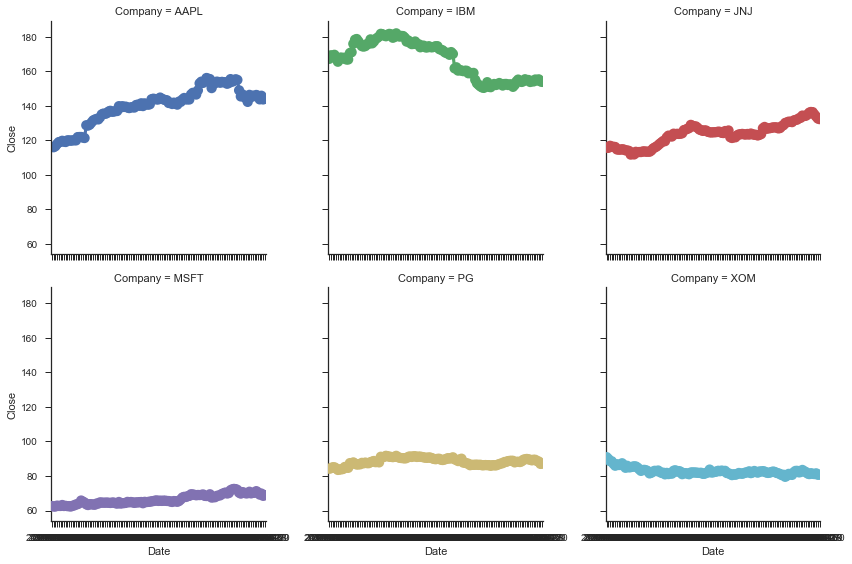

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="ticks")

# Plot EOD stock closing price vs Date for each company.
# Color of plot elements is determined by company name (hue="Company"),
# plot panels are also arranged in columns accordingly (col="Company").
# The col_wrap parameter determines the number of panels per row (col_wrap=3).
g = sns.factorplot(x="Date", y="Close", 
                   hue="Company", col="Company", 
                   data=stock_df, col_wrap=3)

plt.savefig("../images/ch05/B07915_05_factorplot.png", dpi=300)
plt.show()

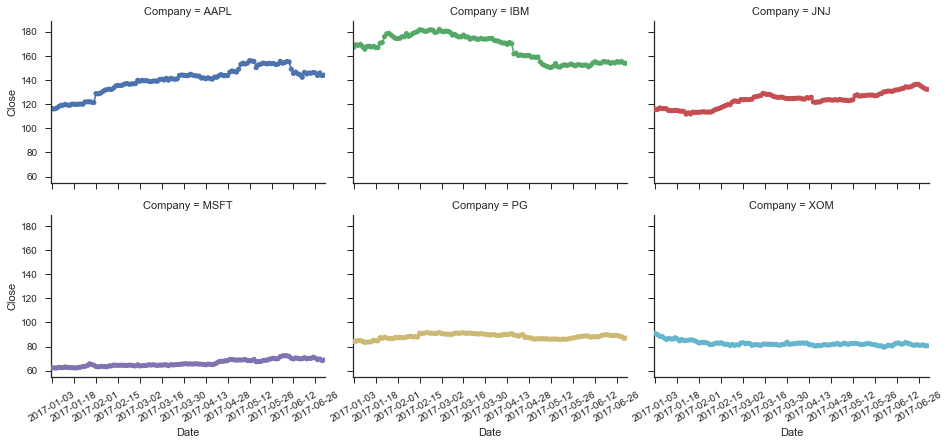

In [68]:
# Increase the aspect ratio and size of each panel
g = sns.factorplot(x="Date", y="Close", 
                   hue="Company", col="Company", 
                   data=stock_df,
                   col_wrap=3, size=3,
                   scale=0.5, aspect=1.5)

# Thinning of ticks (select 1 in 10)
locs, labels = plt.xticks()
g.set(xticks=locs[0::10], xticklabels=labels[0::10])

# Rotate the tick labels to prevent overlap
g.set_xticklabels(rotation=30)

# Reduce the white space between plots
g.fig.subplots_adjust(wspace=.1, hspace=.2)
plt.savefig("../images/ch05/B07915_05_factorplot2.png", dpi=300)
plt.show()

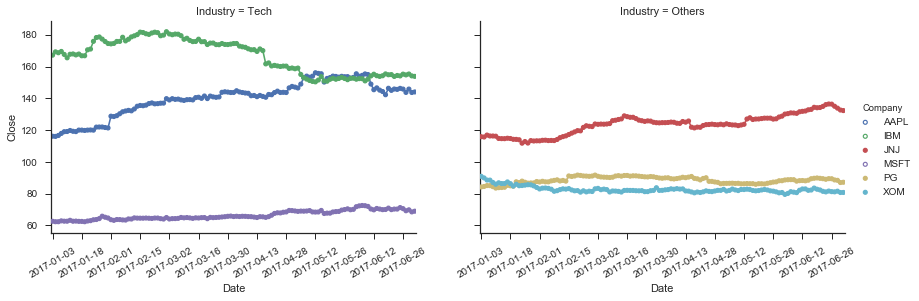

In [69]:
# Create faceted plot separated by industry
g = sns.factorplot(x="Date", y="Close", 
                   hue="Company", col="Industry", 
                   data=stock_df, size=4, 
                   aspect=1.5, scale=0.5)

locs, labels = plt.xticks()
g.set(xticks=locs[0::10], xticklabels=labels[0::10])
g.set_xticklabels(rotation=30)
plt.savefig("../images/ch05/B07915_05_factorplot3.png", dpi=300)
plt.show()

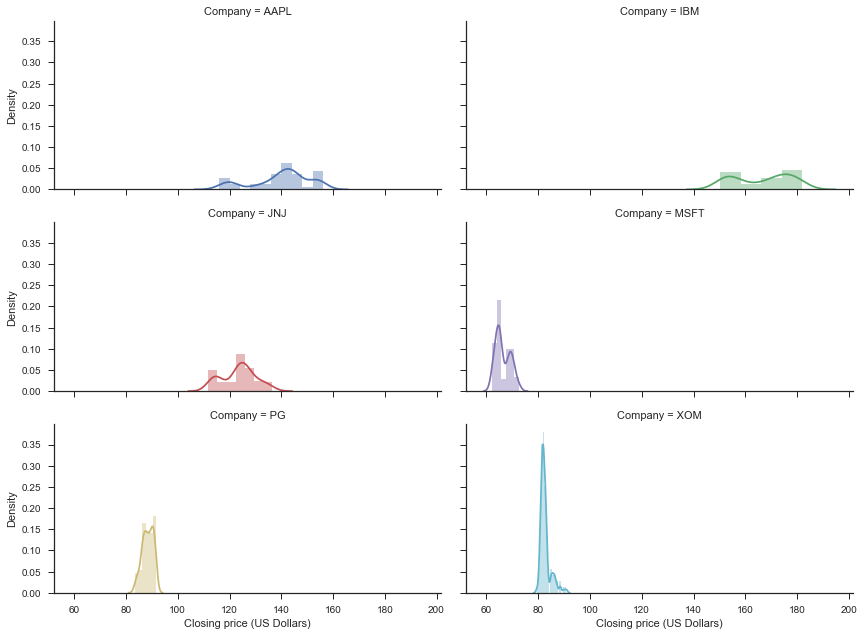

In [70]:
# Create a FacetGrid
g = sns.FacetGrid(stock_df, col="Company", hue="Company",
                  size=3, aspect=2, col_wrap=2)

# Map the seaborn.distplot function to the panels,
# which shows a histogram of closing prices.
g.map(sns.distplot, "Close")

# Label the axes
g.set_axis_labels("Closing price (US Dollars)", "Density")
plt.savefig("../images/ch05/B07915_05_facetgrid.png", dpi=300)
plt.show()

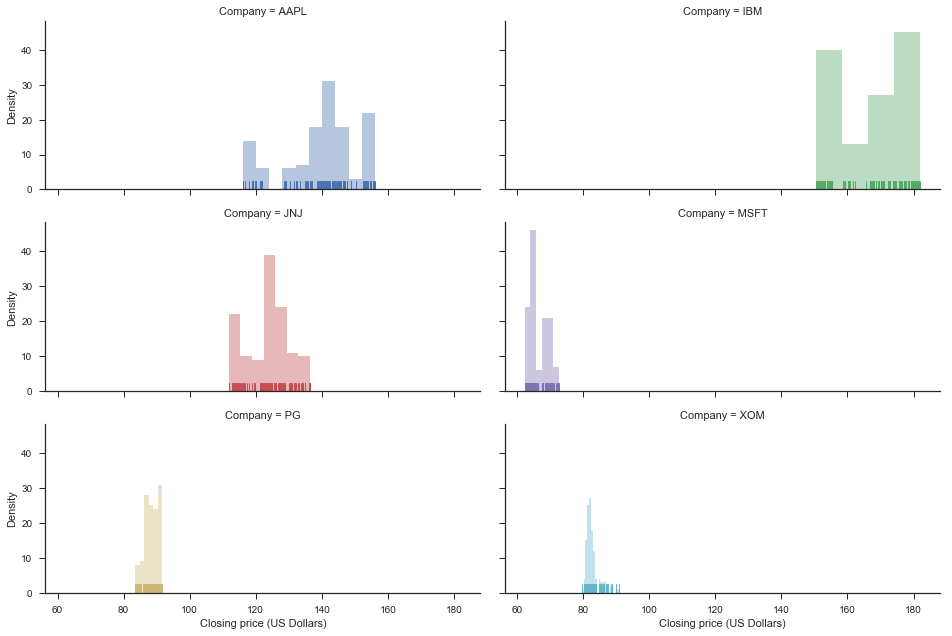

In [71]:
g = sns.FacetGrid(stock_df, col="Company", hue="Company",
                  size=3, aspect=2.2, col_wrap=2)

# We can supply extra kwargs to the plotting function.
# Let's turn off KDE line (kde=False), and plot raw 
# frequency of bins only (norm_hist=False).
# By setting rug=True, tick marks that denotes the
# density of data points will be shown in the bottom.
g.map(sns.distplot, "Close", kde=False, norm_hist=False, rug=True)

g.set_axis_labels("Closing price (US Dollars)", "Density")
plt.savefig("../images/ch05/B07915_05_facetgrid2.png", dpi=300)
plt.show()

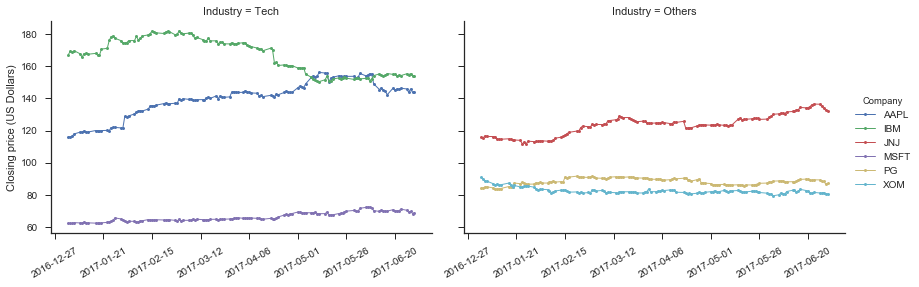

In [72]:
from matplotlib.dates import DateFormatter


g = sns.FacetGrid(stock_df, hue="Company", col="Industry",
                  size=4, aspect=1.5, col_wrap=2)

# plt.plot doesn't support string-formatted Date,
# so we need to use the Datetime column that we
# prepared earlier instead.
g.map(plt.plot, "Datetime", "Close", marker="o", markersize=3, linewidth=1)
g.add_legend()

# We can access individual axes through g.axes[column]
# or g.axes[row,column] if multiple rows are present.
# Let's adjust the tick formatter and rotate the tick labels
# in each axes.
for col in range(2):
    g.axes[col].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.setp(g.axes[col].get_xticklabels(), rotation=30)
    
g.set_axis_labels("", "Closing price (US Dollars)")
plt.savefig("../images/ch05/B07915_05_facetgrid3.png", dpi=300)
plt.show()

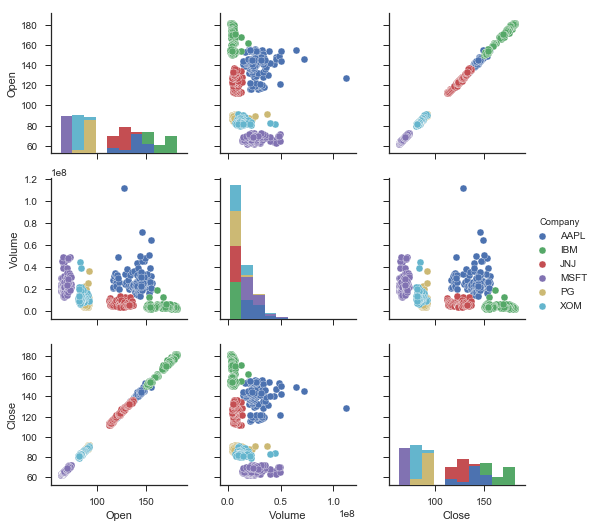

In [73]:
# Show a pairplot of three selected variables (vars=["Open", "Volume", "Close"])
g = sns.pairplot(stock_df, hue="Company", 
                 vars=["Open", "Volume", "Close"])
plt.savefig("../images/ch05/B07915_05_pairplot.png", dpi=300)
plt.show()

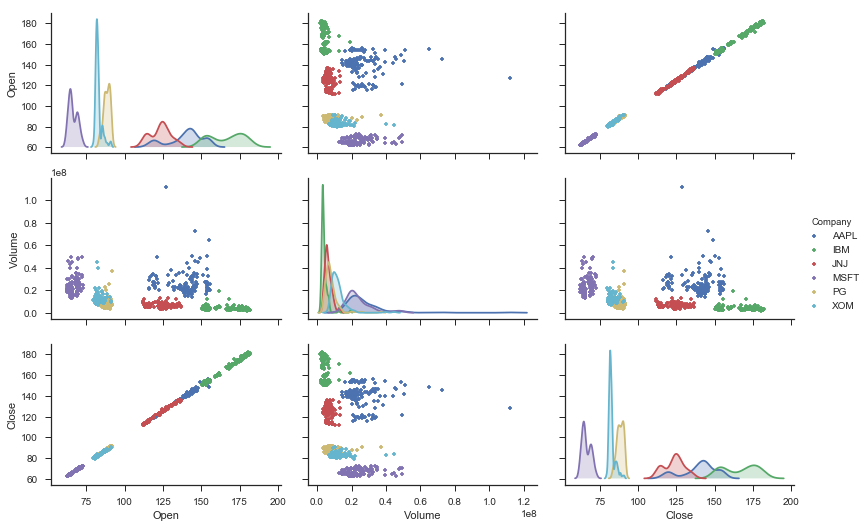

In [74]:
# Adjust the aesthetics of the plot
g = sns.pairplot(stock_df, hue="Company", 
                 aspect=1.5, diag_kind="kde", 
                 diag_kws=dict(shade=True),
                 plot_kws=dict(s=15, marker="+"),
                 vars=["Open", "Volume", "Close"])
plt.savefig("../images/ch05/B07915_05_pairplot2.png", dpi=300)
plt.show()

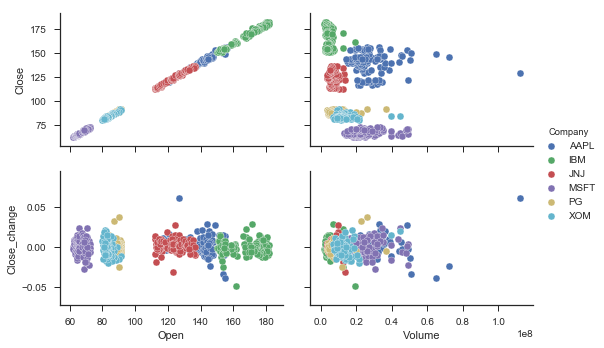

In [75]:
# Manually defining the comparisons that we are interested.
g = sns.pairplot(stock_df, hue="Company", aspect=1.5,
                 x_vars=["Open", "Volume"],
                 y_vars=["Close", "Close_change"])
plt.savefig("../images/ch05/B07915_05_pairplot3.png", dpi=300)
plt.show()

In [15]:
stock_change = stock_df.pivot(index='Date', columns='Company', values='Close_change')
stock_change = stock_change.loc["2017-06-01":"2017-06-30"]
stock_change.head()

Company,AAPL,IBM,JNJ,MSFT,PG,XOM
Date,,,,,,
2017-06-01,0.002749,0.000262,0.004133,0.003723,0.000454,0.002484
2017-06-02,0.014819,-0.004061,0.010095,0.023680,0.005220,-0.014870
2017-06-05,-0.009778,0.002368,0.002153,0.007246,0.001693,0.007799
2017-06-06,0.003378,-0.000262,0.003605,0.003320,0.000676,0.013605
2017-06-07,0.005957,-0.009123,-0.000611,-0.001793,-0.000338,-0.003694


With the pivot table ready, we can proceed to plot our first heatmap.

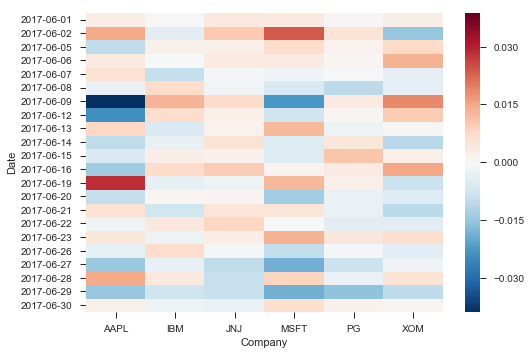

In [76]:
ax = sns.heatmap(stock_change)
plt.savefig("../images/ch05/B07915_05_heatmap.png", dpi=300)
plt.show()

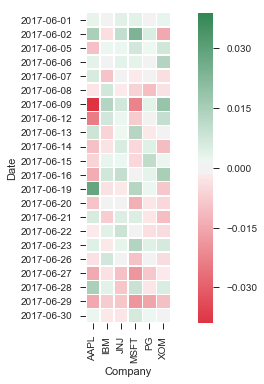

In [80]:
# Create a new red-green color map using the husl color system
# h_neg and h_pos determines the hue of the extents of the color map.
# s determines the color saturation
# l determines the lightness
# sep determines the width of center point
# In addition, we need to set as_cmap=True as the cmap paramter of sns.heatmap 
# expects matplotlib colormap object.
rdgn = sns.diverging_palette(h_neg=10, h_pos=140, s=80, l=50, sep=10, as_cmap=True)

# Change to square blocks (square=True), add a thin
# border (linewidths=.5), and change the color map
# to follow US stocks market convention (cmap="RdGn").
ax = sns.heatmap(stock_change, cmap=rdgn,
                 linewidths=.5, square=True)

plt.tight_layout()

plt.savefig("../images/ch05/B07915_05_heatmap2.png", dpi=300)
plt.show()

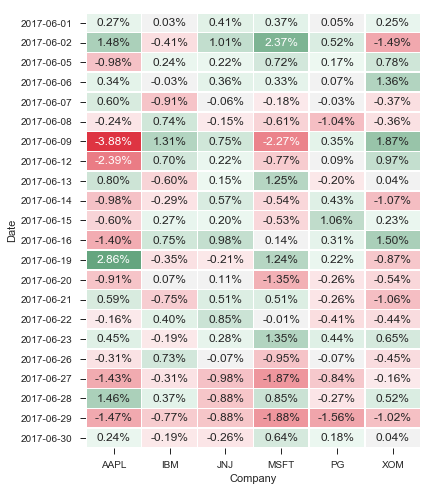

In [78]:
fig = plt.figure(figsize=(6,8))

# Set annot=True to overlay the values.
# We can also assign python format string to fmt. 
# For example ".2%" refers to percentage values with
# two decimal points.
ax = sns.heatmap(stock_change, cmap=rdgn,
                 annot=True, fmt=".2%",
                 linewidths=.5, cbar=False)
plt.savefig("../images/ch05/B07915_05_heatmap3.png", dpi=300)
plt.show()

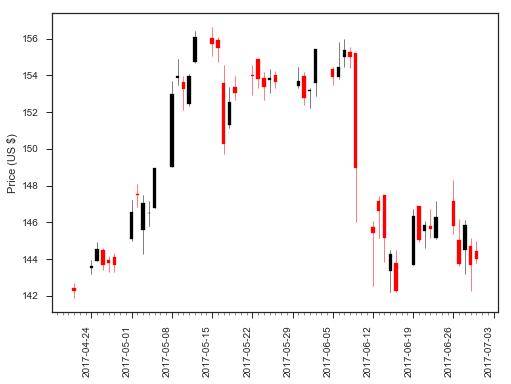

In [81]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, WeekdayLocator, DayLocator, DateFormatter, MONDAY
from matplotlib.finance import candlestick_ohlc


# Extract stocks data for AAPL.
# candlestick_ohlc expects Date (in floating point number), Open, High, Low, Close columns only
# So we need to select the useful columns first using DataFrame.loc[]. Extra columns can exist, 
# but they are ignored. Next we get the data for the last 50 trading only for simplicity of plots.
candlestick_data = stock_df[stock_df["Company"]=="AAPL"]\
                    .loc[:, ["Datetime", "Open", "High", "Low", "Close", "Volume"]]\
                    .iloc[-50:]

# Create a new Matplotlib figure
fig, ax = plt.subplots()

# Prepare a candlestick plot
candlestick_ohlc(ax, candlestick_data.values, width=0.6)

ax.xaxis.set_major_locator(WeekdayLocator(MONDAY)) # major ticks on the mondays
ax.xaxis.set_minor_locator(DayLocator()) # minor ticks on the days
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.xaxis_date() # treat the x data as dates
# rotate all ticks to vertical
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right') 

ax.set_ylabel('Price (US $)') # Set y-axis label
plt.savefig("../images/ch05/B07915_05_candle.png", dpi=300)
plt.show()

In [58]:
from stockstats import StockDataFrame


# Convert to StockDataFrame
# Need to pass a copy of candlestick_data to StockDataFrame.retype
# Otherwise the original candlestick_data will be modified
stockstats = StockDataFrame.retype(candlestick_data.copy())

# 5-day exponential moving average on closing price
ema_5 = stockstats["close_5_ema"]
# 20-day exponential moving average on closing price
ema_20 = stockstats["close_20_ema"]
# 50-day exponential moving average on closing price
ema_50 = stockstats["close_50_ema"]
# Upper Bollinger band
boll_ub = stockstats["boll_ub"]
# Lower Bollinger band
boll_lb = stockstats["boll_lb"]
# 7-day Relative Strength Index
rsi_7 = stockstats['rsi_7']
# 14-day Relative Strength Index
rsi_14 = stockstats['rsi_14']

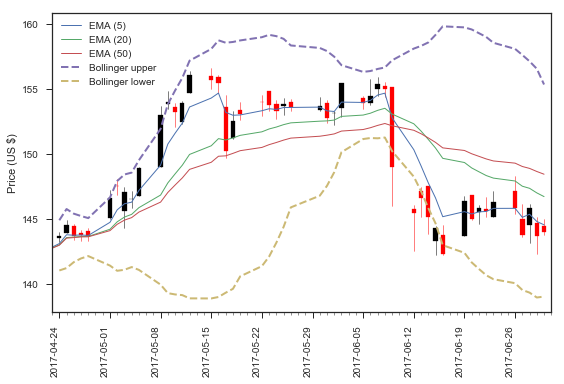

In [84]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, WeekdayLocator, DayLocator, DateFormatter, MONDAY
from matplotlib.finance import candlestick_ohlc


# Create a new Matplotlib figure
fig, ax = plt.subplots()

# Prepare a candlestick plot
candlestick_ohlc(ax, candlestick_data.values, width=0.6)

# Plot stock indicators in the same plot
ax.plot(candlestick_data["Datetime"], ema_5, lw=1, label='EMA (5)')
ax.plot(candlestick_data["Datetime"], ema_20, lw=1, label='EMA (20)')
ax.plot(candlestick_data["Datetime"], ema_50, lw=1, label='EMA (50)')
ax.plot(candlestick_data["Datetime"], boll_ub, lw=2, linestyle="--", label='Bollinger upper')
ax.plot(candlestick_data["Datetime"], boll_lb, lw=2, linestyle="--", label='Bollinger lower')

ax.xaxis.set_major_locator(WeekdayLocator(MONDAY)) # major ticks on the mondays
ax.xaxis.set_minor_locator(DayLocator()) # minor ticks on the days
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.xaxis_date() # treat the x data as dates
# rotate all ticks to vertical
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right') 

ax.set_ylabel('Price (US $)')  # Set y-axis label

# Limit the x-axis range from 2017-4-23 to 2017-7-1
datemin = datetime.date(2017, 4, 23)
datemax = datetime.date(2017, 7, 1)
ax.set_xlim(datemin, datemax)

plt.legend() # Show figure legend
plt.tight_layout()
plt.savefig("../images/ch05/B07915_05_candle2.png", dpi=300)
plt.show()

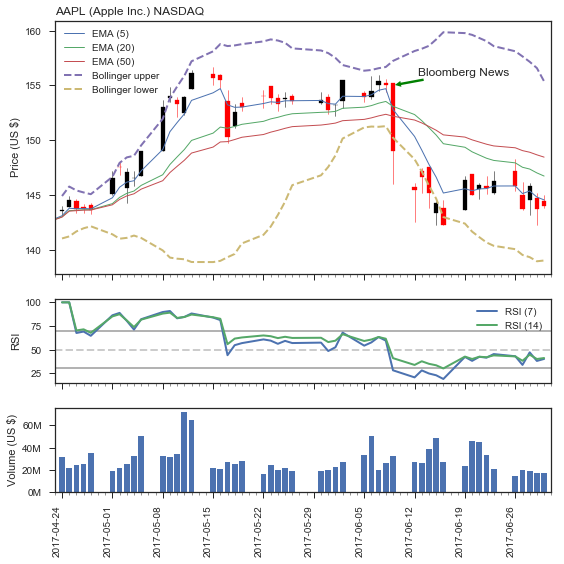

In [83]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, WeekdayLocator, DayLocator, DateFormatter, MONDAY
from matplotlib.finance import candlestick_ohlc
from matplotlib.ticker import FuncFormatter


# FuncFormatter to convert tick values to Millions
def millions(x, pos):
    return '%dM' % (x/1e6)

# Create 3 subplots spread acrosee three rows, with shared x-axis. 
# The height ratio is specified via gridspec_kw
fig, axarr = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8,8),
                         gridspec_kw={'height_ratios':[3,1,1]})

# Prepare a candlestick plot in the first axes
candlestick_ohlc(axarr[0], candlestick_data.values, width=0.6)

# Overlay stock indicators in the first axes
axarr[0].plot(candlestick_data["Datetime"], ema_5, lw=1, label='EMA (5)')
axarr[0].plot(candlestick_data["Datetime"], ema_20, lw=1, label='EMA (20)')
axarr[0].plot(candlestick_data["Datetime"], ema_50, lw=1, label='EMA (50)')
axarr[0].plot(candlestick_data["Datetime"], boll_ub, lw=2, linestyle="--", label='Bollinger upper')
axarr[0].plot(candlestick_data["Datetime"], boll_lb, lw=2, linestyle="--", label='Bollinger lower')

# Display RSI in the second axes
axarr[1].axhline(y=30, lw=2, color = '0.7') # Line for oversold threshold
axarr[1].axhline(y=50, lw=2, linestyle="--", color = '0.8') # Neutral RSI
axarr[1].axhline(y=70, lw=2, color = '0.7') # Line for overbought threshold
axarr[1].plot(candlestick_data["Datetime"], rsi_7, lw=2, label='RSI (7)')
axarr[1].plot(candlestick_data["Datetime"], rsi_14, lw=2, label='RSI (14)')

# Display trade volume in the third axes
axarr[2].bar(candlestick_data["Datetime"], candlestick_data['Volume'])

# Mark the market reaction to the Bloomberg news
# https://www.bloomberg.com/news/articles/2017-06-09/apple-s-new-iphones-said-to-miss-out-on-higher-speed-data-links
# http://markets.businessinsider.com/news/stocks/apple-stock-price-falling-new-iphone-speed-2017-6-1002082799
axarr[0].annotate("Bloomberg News",
            xy=(datetime.date(2017, 6, 9), 155), xycoords='data',
            xytext=(25, 10), textcoords='offset points', size=12,
            arrowprops=dict(arrowstyle="simple",
                           fc="green", ec="none"))

# Label the axes
axarr[0].set_ylabel('Price (US $)')
axarr[1].set_ylabel('RSI')
axarr[2].set_ylabel('Volume (US $)')

axarr[2].xaxis.set_major_locator(WeekdayLocator(MONDAY)) # major ticks on the mondays
axarr[2].xaxis.set_minor_locator(DayLocator()) # minor ticks on the days
axarr[2].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
axarr[2].xaxis_date() # treat the x data as dates
axarr[2].yaxis.set_major_formatter(FuncFormatter(millions)) # Change the y-axis ticks to millions
plt.setp(axarr[2].get_xticklabels(), rotation=90, horizontalalignment='right') # Rotate x-tick labels by 90 degree

# Limit the x-axis range from 2017-4-23 to 2017-7-1
datemin = datetime.date(2017, 4, 23)
datemax = datetime.date(2017, 7, 1)
axarr[2].set_xlim(datemin, datemax)

# Show figure legend
axarr[0].legend()
axarr[1].legend()

# Show figure title
axarr[0].set_title("AAPL (Apple Inc.) NASDAQ", loc='left')

# Reduce unneccesary white space
plt.tight_layout()
plt.savefig("../images/ch05/B07915_05_candle3.png", dpi=300)
plt.show()

In [86]:
import pandas as pd


source = "https://raw.githubusercontent.com/PointCloudLibrary/data/master/tutorials/ism_train_cat.pcd"
cat_df = pd.read_csv(source, skiprows=11, delimiter=" ", names=["x","y","z"], encoding='latin_1')  
cat_df.head()

,x,y,z
0,-17.034178,18.972282,40.482403
1,-16.881481,21.815451,44.156799
2,-16.749582,18.154911,34.131474
3,-16.876919,20.598286,36.271809
4,-16.849340,17.403711,42.993984


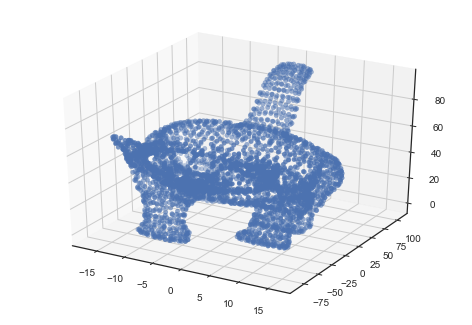

In [94]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cat_df.x, cat_df.y, cat_df.z)

plt.savefig("../images/ch05/B07915_05_3d_scatter.png", dpi=300)
plt.show()

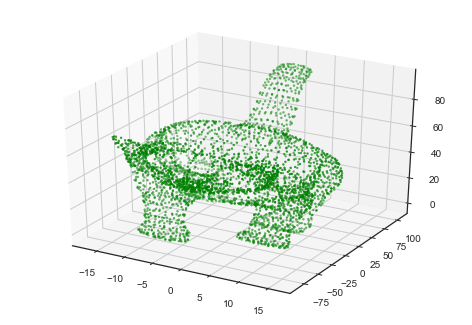

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Change the size, shape and color of markers
ax.scatter(cat_df.x, cat_df.y, cat_df.z, s=4, c="g", marker="o")

plt.savefig("../images/ch05/B07915_05_3d_scatter2.png", dpi=300)
plt.show()

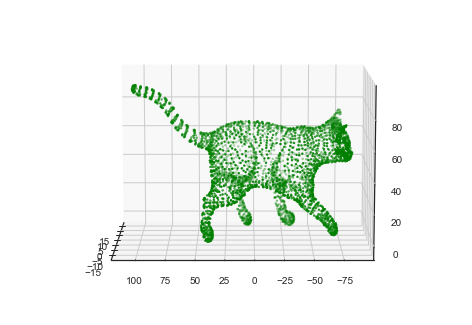

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cat_df.x, cat_df.y, cat_df.z,s=4, c="g", marker="o")

# elev stores the elevation angle in the z plane azim stores the azimuth angle in the x,y plane
ax.view_init(azim=180, elev=10)

plt.show()

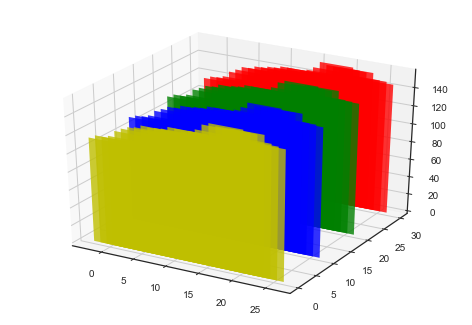

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Get 1 and every fifth row for the 5-day AAPL OHLC data
ohlc_5d = stock_df[stock_df["Company"]=="AAPL"].iloc[1::5, :]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create one color-coded bar chart for Open, High, Low and Close prices.
for color, col, z in zip(['r', 'g', 'b', 'y'], ["Open", "High", "Low", "Close"], [30, 20, 10, 0]):
    xs = np.arange(ohlc_5d.shape[0])
    ys = ohlc_5d[col]

    # Assign color to the bars
    colors = [color] * len(xs)
    ax.bar(xs, ys, zs=z, zdir='y', color=colors, alpha=0.8, width=5)

plt.savefig("../images/ch05/B07915_05_3d_bar.png", dpi=300)
plt.show()

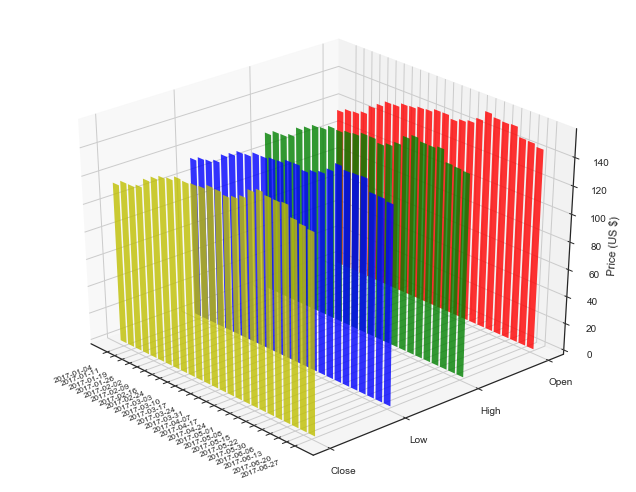

In [104]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

# Create one color-coded bar chart for Open, High, Low and Close prices.
for color, col, z in zip(['r', 'g', 'b', 'y'], ["Open", "High", "Low", "Close"], [30, 20, 10, 0]):
    xs = np.arange(ohlc_5d.shape[0])
    ys = ohlc_5d[col]

    # Assign color to the bars 
    colors = [color] * len(xs)
    ax.bar(xs, ys, zs=z, zdir='y', color=colors, alpha=0.8)

# Manually assign the ticks and tick labels
ax.set_xticks(np.arange(ohlc_5d.shape[0]))
ax.set_xticklabels(ohlc_5d["Date"], rotation=20,
                   verticalalignment='baseline',
                   horizontalalignment='right',
                   fontsize='8')
ax.set_yticks([30, 20, 10, 0])
ax.set_yticklabels(["Open", "High", "Low", "Close"])

# Set the z-axis label
ax.set_zlabel('Price (US $)')

# Rotate the viewport
ax.view_init(azim=-42, elev=31)
plt.tight_layout()
plt.savefig("../images/ch05/B07915_05_3d_bar2.png", dpi=300)
plt.show()

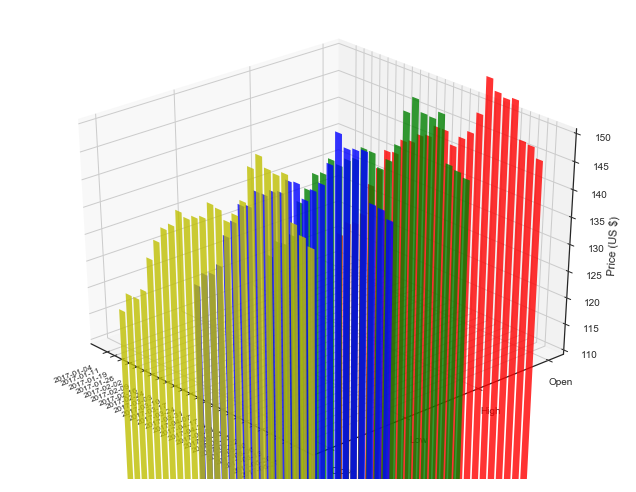

In [105]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

# Create one color-coded bar chart for Open, High, Low and Close prices.
for color, col, z in zip(['r', 'g', 'b', 'y'], ["Open", "High", "Low", "Close"], [30, 20, 10, 0]):
    xs = np.arange(ohlc_5d.shape[0])
    ys = ohlc_5d[col]

    # Assign color to the bars 
    colors = [color] * len(xs)
    ax.bar(xs, ys, zs=z, zdir='y', color=colors, alpha=0.8)

# Manually assign the ticks and tick labels
ax.set_xticks(np.arange(ohlc_5d.shape[0]))
ax.set_xticklabels(ohlc_5d["Date"], rotation=20,
                   verticalalignment='baseline',
                   horizontalalignment='right',
                   fontsize='8')
ax.set_yticks([30, 20, 10, 0])
ax.set_yticklabels(["Open", "High", "Low", "Close"])

# Set the z-axis label
ax.set_zlabel('Price (US $)')

# Rotate the viewport
ax.view_init(azim=-42, elev=31)
ax.set_zlim3d(bottom=110, top=150)
plt.tight_layout()
plt.savefig("../images/ch05/B07915_05_3d_bar3.png", dpi=300)
plt.show()

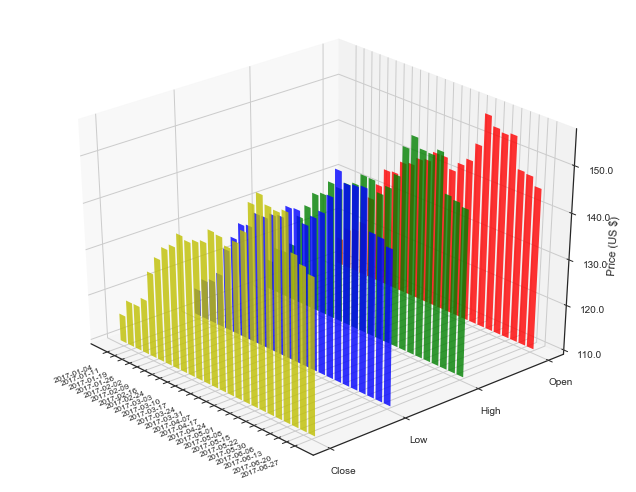

In [106]:
# Funcformatter to add 110 to the tick labels
def major_formatter(x, pos):
    return "{}".format(x+110)
    
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

# Create one color-coded bar chart for Open, High, Low and Close prices.
for color, col, z in zip(['r', 'g', 'b', 'y'], ["Open", "High", "Low", "Close"], [30, 20, 10, 0]):
    xs = np.arange(ohlc_5d.shape[0])
    ys = ohlc_5d[col]

    # Assign color to the bars 
    colors = [color] * len(xs)
    
    # Truncate the y-values by 110
    ax.bar(xs, ys-110, zs=z, zdir='y', color=colors, alpha=0.8)

# Manually assign the ticks and tick labels
ax.set_xticks(np.arange(ohlc_5d.shape[0]))
ax.set_xticklabels(ohlc_5d["Date"], rotation=20,
                   verticalalignment='baseline',
                   horizontalalignment='right',
                   fontsize='8')

# Set the z-axis label
ax.set_yticks([30, 20, 10, 0])
ax.set_yticklabels(["Open", "High", "Low", "Close"])
ax.zaxis.set_major_formatter(FuncFormatter(major_formatter))
ax.set_zlabel('Price (US $)')

# Rotate the viewport
ax.view_init(azim=-42, elev=31)
plt.tight_layout()
plt.savefig("../images/ch05/B07915_05_3d_bar4.png", dpi=300)
plt.show()